<a href="https://colab.research.google.com/github/cafigueroao/peru-web-training-2024/blob/main/LecturaArchivosNetCDF_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar bibliotecas

Cargar bibliotecas en Python es crucial para extender las capacidades del lenguaje y aprovechar soluciones especializadas desarrolladas por expertos. Estas bibliotecas ofrecen métodos optimizados y funcionalidades avanzadas que permiten a los desarrolladores resolver problemas complejos de manera eficiente y reutilizar código probado y documentado. Además, importar bibliotecas sigue estándares de la comunidad, asegurando consistencia y facilitando la adopción de mejores prácticas en el desarrollo de software. En conjunto, la importación de bibliotecas en Python no solo mejora la productividad y reduce errores, sino que también amplía la flexibilidad y adaptabilidad del lenguaje para una variedad de aplicaciones y proyectos.

In [1]:
from google.colab import drive
import gdown

## Montar Google Drive

Primero, es necesario conectar tu Google Drive para poder acceder a él desde Google Colab y guardar archivos de trabajo así como los resultados en tu almacenamiento en la nube.

In [2]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde quieres crear la nueva carpeta dentro de tu Google Drive
folder_path = '/content/drive/My Drive/WEAP/'

# Crear la carpeta usando el comando mkdir
!mkdir "{folder_path}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My Drive/WEAP/’: File exists


## Descargar archivos necesarios
El siguiente bloque ejecutará las rutinas necesarias para descargar los archivos esenciales para el desarrollo del taller, que comprenden: i) un modelo digital de elevación en formato raster, y ii) las cuencas delimitadas utilizando las herramientas proporcionadas por el software WEAP en formato vectorial.

In [3]:
# URL del enlace compartido de Google Drive
gdrive_url = 'https://drive.google.com/uc?id=1DzEFx2sWtsR73To42b6CWucRzl8aF5ul'

# Ruta donde descargar el archivo TIF en Colab
input_file = '/content/drive/My Drive/WEAP/Pcp_Tumbes.nc'

# Descargar el archivo TIF desde Google Drive
gdown.download(gdrive_url, input_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1DzEFx2sWtsR73To42b6CWucRzl8aF5ul
To: /content/drive/My Drive/WEAP/Pcp_Tumbes.nc
100%|██████████| 628k/628k [00:00<00:00, 9.10MB/s]


'/content/drive/My Drive/WEAP/Pcp_Tumbes.nc'

# Código en R

In [4]:
%load_ext rpy2.ipython


In [5]:
%%R
install.packages("pacman")
library(pacman)

(as ‘lib’ is unspecified)







	‘/tmp/RtmplvyyCB/downloaded_packages’



In [6]:
%%R
t.inicio <- Sys.time()
pacman::p_load("raster")
pacman::p_load("Rcpp")
pacman::p_load("dplyr")
pacman::p_load("ncdf4")
pacman::p_load("sf")
t.fin <- Sys.time()
duracion <- t.fin - t.inicio
print(duracion)

Time difference of 8.326817 secs


In [7]:
%%R
# Cargar librerias y funciones
library(raster)
library(dplyr)

In [8]:
%%R
# Lectura datos (WGS84)
sr <- brick('/content/drive/My Drive/WEAP/Pcp_Tumbes.nc')
sv <- shapefile('/content/drive/My Drive/WEAP/WEAPCatchment_24877.shp')


In [9]:
%%R
# Reproyectar el raster a EPSG 24877
dest_crs <- "+proj=lcc +lat_1=-4.5 +lat_2=-18.0 +lat_0=0 +lon_0=-72 +x_0=500000 +y_0=5000000 +datum=WGS84 +units=m +no_defs"
sr <- projectRaster(sr, crs = dest_crs)


La función `extract` en R, perteneciente a la biblioteca `raster`, se utiliza para obtener valores de píxeles de un raster en ubicaciones específicas definidas por geometrías vectoriales, como puntos, líneas o polígonos.

Cuando se usa `extract` con el parámetro `weights=TRUE`, se introduce la capacidad de ponderar los valores de píxeles extraídos según el área de las geometrías vectoriales. Esto significa que los valores de píxeles se ajustan proporcionalmente al área de la geometría en la que se encuentran. Esto es particularmente útil en situaciones donde las geometrías vectoriales tienen áreas variables y se desea calcular promedios ponderados o sumas ponderadas de los valores raster dentro de estas áreas.

En resumen, la función `extract` de `raster` en R no solo facilita la extracción de datos de píxeles de rasters para ubicaciones específicas, sino que también proporciona flexibilidad adicional al permitir la ponderación de estos datos por el área de las geometrías vectoriales, mejorando así la precisión y relevancia de los análisis espaciales realizados.

In [10]:
%%R
# Programa principal
e <- extract(x=sr,
             y=sv,
             fun=mean,
             weights=TRUE,
             na.rm = TRUE,
             df=TRUE,
             sp=TRUE)


In [12]:
%%R
e        <- e@data

In [13]:
%%R
names(e)

  [1] "ObjID"      "BasinID"    "Name"       "NumCells"   "Area_KM2"  
  [6] "PourPtLon"  "PourPtLat"  "HeadFPtLon" "HeadFPtLat" "lDrawRiver"
 [11] "RiverID"    "lRiverEnd"  "InflowLon"  "InflowLat"  "MinElev"   
 [16] "MaxElev"    "AvgElev"    "X252.5"     "X253.5"     "X254.5"    
 [21] "X255.5"     "X256.5"     "X257.5"     "X258.5"     "X259.5"    
 [26] "X260.5"     "X261.5"     "X262.5"     "X263.5"     "X264.5"    
 [31] "X265.5"     "X266.5"     "X267.5"     "X268.5"     "X269.5"    
 [36] "X270.5"     "X271.5"     "X272.5"     "X273.5"     "X274.5"    
 [41] "X275.5"     "X276.5"     "X277.5"     "X278.5"     "X279.5"    
 [46] "X280.5"     "X281.5"     "X282.5"     "X283.5"     "X284.5"    
 [51] "X285.5"     "X286.5"     "X287.5"     "X288.5"     "X289.5"    
 [56] "X290.5"     "X291.5"     "X292.5"     "X293.5"     "X294.5"    
 [61] "X295.5"     "X296.5"     "X297.5"     "X298.5"     "X299.5"    
 [66] "X300.5"     "X301.5"     "X302.5"     "X303.5"     "X304.5"    
 [71] 

In [14]:
%%R
aux      <- c(2,seq(18,ncol(e)))
e        <- e[,aux]
e        <- as.data.frame(t(e))
names(e) <- e[1,]
e        <- e[-1,]


In [15]:
%%R
# Define las fechas de inicio y fin
fecha_inicio <- as.Date("1981-01-01")
fecha_fin <- as.Date("2024-03-01")

# Crea la secuencia mensual
Date <- seq(from = fecha_inicio, to = fecha_fin, by = "month")

# Ajusta las fechas al primer día de cada mes
Date <- as.Date(format(Date, "%Y-%m-01"))
Date <- data.frame(Date = Date)


In [16]:
%%R
e  <- cbind(Date, e)
names(e) <- c("Date", "Cuenca_1", "Cuenca_2", "Cuenca_3")
print(head(e))

             Date  Cuenca_1   Cuenca_2   Cuenca_3
X252.5 1981-01-01  75.70450  47.979286  4.2146408
X253.5 1981-02-01 156.40746 132.673816 64.0641762
X254.5 1981-03-01 254.84422 210.402677 64.4119659
X255.5 1981-04-01 124.56449 102.185970 32.4577436
X256.5 1981-05-01  35.77363  25.811077  0.7411502
X257.5 1981-06-01  12.09762   5.937924  1.0381983


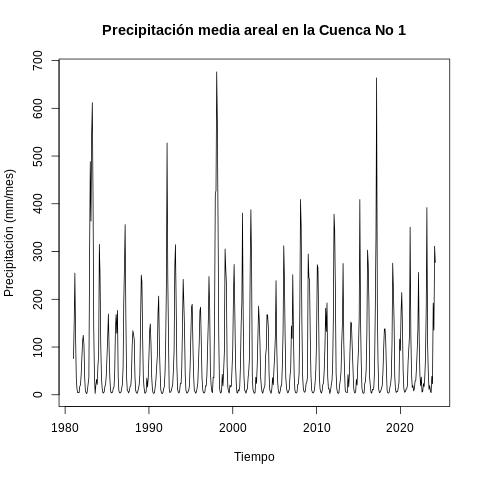

In [17]:
%%R
plot(e$Date, e$Cuenca_1,
     type = "l",  # Tipo de gráfico: líneas
     xlab = "Tiempo",  # Etiqueta del eje x
     ylab = "Precipitación (mm/mes)",  # Etiqueta del eje y
     main = "Precipitación media areal en la Cuenca No 1")

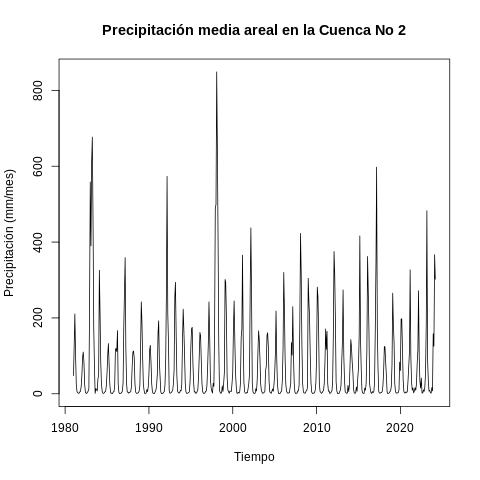

In [18]:
%%R
plot(e$Date, e$Cuenca_2,
     type = "l",  # Tipo de gráfico: líneas
     xlab = "Tiempo",  # Etiqueta del eje x
     ylab = "Precipitación (mm/mes)",  # Etiqueta del eje y
     main = "Precipitación media areal en la Cuenca No 2")

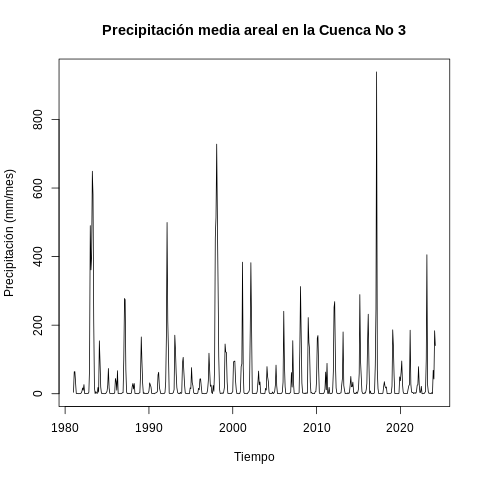

In [19]:
%%R
plot(e$Date, e$Cuenca_3,
     type = "l",  # Tipo de gráfico: líneas
     xlab = "Tiempo",  # Etiqueta del eje x
     ylab = "Precipitación (mm/mes)",  # Etiqueta del eje y
     main = "Precipitación media areal en la Cuenca No 3")

In [23]:
%%R
# Guardar resultados en Drive
write.csv(e, '/content/drive/My Drive/WEAP/precipitacionAreal.csv', row.names = FALSE)